# 1. Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
adobe = pd.read_excel("Adobe.xlsx")
amazon = pd.read_excel("Amazon.xlsx")
apple = pd.read_excel("Apple.xlsx")
google = pd.read_excel("Google.xlsx")
intel = pd.read_excel("Intel.xlsx")
meta = pd.read_excel("Meta.xlsx")
microsoft = pd.read_excel("Microsoft.xlsx")
netflix = pd.read_excel("Netflix.xlsx")
nvidia = pd.read_excel("NVIDIA.xlsx")
oracle = pd.read_excel("Oracle.xlsx")

IBES = pd.read_excel("IBES_final.xlsx")
Roberta = pd.read_excel("Roberta.xlsx")
dictionary = pd.read_excel("dictionary.xlsx")
Textblob = pd.read_excel("Textblob.xlsx")

def f(r):
    if r<= 0:
        return 0
    if r> 0:
        return 1 

def time_30(dataset,x):
    list1 = [] # save the start date of releasing FS
    price = []
    for i in x:
        select = list(np.where(dataset["Exchange Date"] == i)[0])
        list1.append(select[0])
        
    for i in range(len(list1)):
        price.extend([i for i in range(list1[i],list1[i]+31)])# save the upcoming 30 days after releasing FS
    print(price)
    
    list2 = []
    for i in range(1,10):
        for j in range(i*30,i*30+31):
            A=(dataset["Close"][j]-dataset["Close"][j-1])/dataset["Close"][j-1]
            list2.append(A)
    # print(list2)

    list3 = []
    r1 = sum(list2[1:31])/30
    r2 = sum(list2[31:61])/30
    r3 = sum(list2[61:91])/30
    r4 = sum(list2[91:121])/30
    r5 = sum(list2[121:151])/30
    r6 = sum(list2[151:181])/30
    r7 = sum(list2[181:211])/30
    r8 = sum(list2[211:241])/30
    r9 = sum(list2[241:271])/30
    r10 = sum(list2[271:301])/30
    list3.append(r1)
    list3.append(r2)
    list3.append(r3)
    list3.append(r4)
    list3.append(r5)
    list3.append(r6)
    list3.append(r7)
    list3.append(r8)
    list3.append(r9)
    list3.append(r10)
    list4 = [v for v in list3 for i in range(260)]
    dataset["Return"] = list4[0:len(dataset)]
    dataset["Return"] = dataset["Return"].apply(f)
    
    for t in range(1,7):
        dataset["ac_"+str(t)] = dataset["Return"].shift(t)
        
    return dataset.iloc[price]

In [2]:
AD = time_30(adobe,["2012-01-26","2013-01-22","2014-01-21","2015-01-20","2016-01-19",
                    "2017-01-20","2018-01-22","2019-01-25","2020-01-21","2021-01-15"])

list_roberta=Roberta.iloc[0].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[0].dropna().iloc[1:11]
list_textblob=Textblob.iloc[0].dropna().iloc[1:11]

AD["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[0:10] for i in range(31)]
AD["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[0:10] for i in range(31)]
AD["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[0:10] for i in range(31)]
AD["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[0:10] for i in range(31)]
AD["SENrob"]=[val for val in list_roberta for i in range(31)]
AD["SENdic"]=[val for val in list_dictionary for i in range(31)]
AD["SENtb"]=[val for val in list_textblob for i in range(31)]

train=AD[0:248]
test=AD[248:309]
print(train)
print(test)

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1522, 1523, 1524, 1525, 1526, 1527, 15

In [3]:
AM = time_30(amazon,["2012-02-01","2013-01-30","2014-01-31","2015-01-30","2016-01-29",
                    "2017-02-10","2018-02-02","2019-02-01","2020-01-31","2021-02-03"])

list_roberta=Roberta.iloc[2].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[2].dropna().iloc[1:11]
list_textblob=Textblob.iloc[2].dropna().iloc[1:11]

AM["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[20:30] for i in range(31)]
AM["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[20:30] for i in range(31)]
AM["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[20:30] for i in range(31)]
AM["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:30] for i in range(31)]
AM["SENrob"]=[val for val in list_roberta for i in range(31)]
AM["SENdic"]=[val for val in list_dictionary for i in range(31)]
AM["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,AM[0:248]],axis=0)
test=pd.concat([test,AM[248:309]],axis=0)
print(train)
print(test)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1531, 1532, 1533, 1534, 1535, 1536, 15

In [4]:
# 9 years of apple
AP = time_30(apple,["2012-10-31","2013-10-30","2014-10-27","2015-10-28","2016-10-26",
                    "2017-11-03","2018-11-05","2019-10-31","2020-10-30"])

list_roberta=Roberta.iloc[1].dropna().iloc[1:10]
list_dictionary=dictionary.iloc[1].dropna().iloc[1:10]
list_textblob=Textblob.iloc[1].dropna().iloc[1:10]
list_textblob=Textblob.iloc[1].dropna().iloc[1:10]

AP["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[10:19] for i in range(31)]
AP["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[10:19] for i in range(31)]
AP["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[10:19] for i in range(31)]
AP["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:29] for i in range(31)]
AP["SENrob"]=[val for val in list_roberta for i in range(31)]
AP["SENdic"]=[val for val in list_dictionary for i in range(31)]
AP["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,AP[0:248]],axis=0)
test=pd.concat([test,AP[248:309]],axis=0)
print(train)
print(test)

[208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1722, 1

In [5]:
GO = time_30(google,["2016-03-29","2017-02-03","2018-02-06","2019-02-06","2020-02-04","2021-02-03"])

list_roberta=Roberta.iloc[3].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[3].dropna().iloc[1:11]
list_textblob=Textblob.iloc[3].dropna().iloc[1:11]

GO["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[30:36] for i in range(31)]
GO["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[30:36] for i in range(31)]
GO["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[30:36] for i in range(31)]
GO["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[30:36] for i in range(31)]
GO["SENrob"]=[val for val in list_roberta for i in range(31)]
GO["SENdic"]=[val for val in list_dictionary for i in range(31)]
GO["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,GO[0:124]],axis=0)
test=pd.concat([test,GO[124:185]],axis=0)
print(train)
print(test)

[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310]
    Exchange Date        Close     Vol

In [6]:
IN = time_30(intel,["2012-02-23","2013-02-19","2014-02-14","2015-02-13","2016-02-12",
                    "2017-02-17","2018-02-16","2019-02-01","2020-01-24","2021-01-22"])

list_roberta=Roberta.iloc[4].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[4].dropna().iloc[1:11]
list_textblob=Textblob.iloc[4].dropna().iloc[1:11]


IN["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[36:46] for i in range(31)]
IN["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[36:46] for i in range(31)]
IN["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[36:46] for i in range(31)]
IN["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[36:46] for i in range(31)]
IN["SENrob"]=[val for val in list_roberta for i in range(31)]
IN["SENdic"]=[val for val in list_dictionary for i in range(31)]
IN["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,IN[0:248]],axis=0)
test=pd.concat([test,IN[248:309]],axis=0)
print(train)
print(test)

[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1541, 1542, 1543, 1544, 1545, 1546, 15

In [7]:
ME = time_30(meta,["2013-02-01","2014-01-31","2015-02-13","2016-04-27",
                    "2017-02-03","2018-02-01","2019-01-31","2020-01-30","2021-01-28"])

list_roberta=Roberta.iloc[5].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[5].dropna().iloc[1:11]
list_textblob=Textblob.iloc[5].dropna().iloc[1:11]

ME["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[46:55] for i in range(31)]
ME["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[46:55] for i in range(31)]
ME["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[46:55] for i in range(31)]
ME["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[46:55] for i in range(31)]
ME["SENrob"]=[val for val in list_roberta for i in range(31)]
ME["SENdic"]=[val for val in list_dictionary for i in range(31)]
ME["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,ME[0:217]],axis=0)
test=pd.concat([test,ME[217:278]],axis=0)
print(train)
print(test)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1530, 1531, 1532, 1533, 1534, 1535, 15

In [8]:
MI = time_30(microsoft,["2012-07-26","2013-07-30","2014-07-31","2015-07-31","2016-07-28",
                    "2017-08-02","2018-08-03","2019-08-01","2020-07-30","2021-07-29"])

list_roberta=Roberta.iloc[6].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[6].dropna().iloc[1:11]
list_textblob=Textblob.iloc[6].dropna().iloc[1:11]

MI["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[55:65] for i in range(31)]
MI["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[55:65] for i in range(31)]
MI["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[55:65] for i in range(31)]
MI["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[55:65] for i in range(31)]
MI["SENrob"]=[val for val in list_roberta for i in range(31)]
MI["SENdic"]=[val for val in list_dictionary for i in range(31)]
MI["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,MI[0:248]],axis=0)
test=pd.concat([test,MI[248:309]],axis=0)
print(train)
print(test)

[142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1657, 1

In [9]:
NE = time_30(netflix,["2012-02-10","2013-02-01","2014-02-03","2015-01-29","2016-01-28",
                    "2017-01-27","2018-01-29","2019-01-29","2020-01-29","2021-01-28"])

list_roberta=Roberta.iloc[7].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[7].dropna().iloc[1:11]
list_textblob=Textblob.iloc[7].dropna().iloc[1:11]

NE["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[65:75] for i in range(31)]
NE["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[65:75] for i in range(31)]
NE["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[65:75] for i in range(31)]
NE["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[65:75] for i in range(31)]
NE["SENrob"]=[val for val in list_roberta for i in range(31)]
NE["SENdic"]=[val for val in list_dictionary for i in range(31)]
NE["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,NE[0:248]],axis=0)
test=pd.concat([test,NE[248:309]],axis=0)
print(train)
print(test)

[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1527, 1528, 1529, 1530, 1531, 1532, 15

In [10]:
NV = time_30(nvidia,["2012-03-13","2013-03-12","2014-03-13","2015-03-12","2016-03-17",
                    "2017-03-01","2018-02-28","2019-02-21","2020-02-20","2021-02-26"])

list_roberta=Roberta.iloc[8].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[8].dropna().iloc[1:11]
list_textblob=Textblob.iloc[8].dropna().iloc[1:11]

NV["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[75:85] for i in range(31)]
NV["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[75:85] for i in range(31)]
NV["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[75:85] for i in range(31)]
NV["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[75:85] for i in range(31)]
NV["SENrob"]=[val for val in list_roberta for i in range(31)]
NV["SENdic"]=[val for val in list_dictionary for i in range(31)]
NV["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,NV[0:248]],axis=0)
test=pd.concat([test,NV[248:309]],axis=0)
print(train)
print(test)

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1548, 1549, 1550, 1551, 1552, 1553, 15

In [11]:
OR = time_30(oracle,["2012-06-26","2013-06-26","2014-06-26","2015-06-25","2016-06-22",
                    "2017-06-27","2018-06-22","2019-06-21","2020-06-22","2021-06-02"])

list_roberta=Roberta.iloc[9].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[9].dropna().iloc[1:11]
list_textblob=Textblob.iloc[9].dropna().iloc[1:11]

OR["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[85:95] for i in range(31)]
OR["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[85:95] for i in range(31)]
OR["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[85:95] for i in range(31)]
OR["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[85:95] for i in range(31)]
OR["SENrob"]=[val for val in list_roberta for i in range(31)]
OR["SENdic"]=[val for val in list_dictionary for i in range(31)]
OR["SENtb"]=[val for val in list_textblob for i in range(31)]

train=pd.concat([train,OR[0:248]],axis=0)
test=pd.concat([test,OR[248:309]],axis=0)
print(train)
print(test)

[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1628, 1

# 2. Methods
## 2.1 Lasso & Ridge Regression

In [12]:
x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
#x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
#x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]

y_train=train["Return"]
y_test=test["Return"]

In [13]:
# Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
ridge=Ridge(random_state=1000)

fitted_ridge=GridSearchCV(ridge,param_grid,cv=10,scoring = "r2")
fitted_ridge.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy
R_sq1=r2_score(y_train,fitted_ridge.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_ridge.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Ridge(alpha=0.1).fit(x_train,y_train).coef_

The best tuned parameter of fitted_ridge is: {'alpha': 0} ,and the in-sample R-square is: 0.9846259673898099
The best tuned parameter of fitted_ridge is: {'alpha': 0} ,and the out-of-sample R-square is: 0.9384660576505253


array([ 4.98544828e-04, -1.08581876e-02,  2.08311622e-03, -3.16668138e-03,
        9.80055958e-01,  1.37848411e-02, -2.01038068e-04, -2.08013318e-06,
        9.66576813e-06, -1.78354234e-03])

In [14]:
# Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
lasso=Lasso(random_state=1000)

fitted_lasso=GridSearchCV(lasso,param_grid,cv=10,scoring = "r2")
fitted_lasso.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy
R_sq1=r2_score(y_train,fitted_lasso.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_lasso.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Lasso(alpha=0.0001).fit(x_train,y_train).coef_

The best tuned parameter of fitted_lasso is: {'alpha': 0.0001} ,and the in-sample R-square is: 0.9846245476738155
The best tuned parameter of fitted_lasso is: {'alpha': 0.0001} ,and the out-of-sample R-square is: 0.9552768699546028


array([ 4.17259924e-04, -9.55018742e-03,  0.00000000e+00, -2.39165044e-03,
        9.91665901e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

## 2.2 Classification

In [15]:
#2.2.1.Logistic regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=3,max_iter=6000)
model_lr.fit(x_train,y_train)
y_predict_lr=model_lr.predict(x_test)
model_lr.coef_

array([[ 0.09194689, -1.56417249,  0.2008328 , -0.89611351,  6.48813007,
         2.08891055,  1.040336  ,  0.62940652,  0.40811227,  0.26988788]])

In [16]:
#2.2.2.Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_predict_nb=model_nb.predict(x_test)

In [17]:
#2.2.3.Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)
y_predict_lda=model_lda.predict(x_test)
model_lda.coef_

array([[ 1.28274325e-01, -2.79375919e+00,  5.41886974e-01,
        -8.06531463e-01,  2.57955486e+02,  4.83994762e-01,
        -9.73577759e-02, -3.38027162e-12,  7.82193581e-03,
        -4.66164410e-01]])

In [18]:
#2.2.4.Support Vector Machine (SVC)
from sklearn.svm import SVC
model_svc=SVC(gamma = "auto")
model_svc.fit(x_train,y_train)
y_predict_svc=model_svc.predict(x_test)

Feature: 0, Score: 0.00054
Feature: 1, Score: 0.00024
Feature: 2, Score: 0.00079
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.99838
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


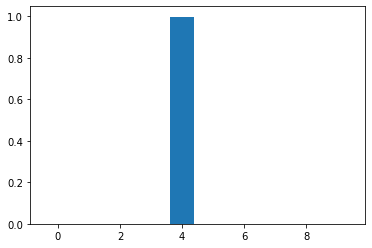

In [19]:
#2.2.5.Decision Tree
from sklearn import tree
model_dt=tree.DecisionTreeClassifier(random_state = 4130)
model_dt.fit(x_train,y_train)
y_predict_dt=model_dt.predict(x_test)
from matplotlib import pyplot
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [20]:
#2.2.6.Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=50)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
print("1.Logistic Regression:",classification_report(y_test,y_predict_lr))
print("2.Naive Bayes:",classification_report(y_test,y_predict_nb))
print("3.Linear Discriminant Analysis",classification_report(y_test,y_predict_lda))
print("4.Support Vector Machine",classification_report(y_test,y_predict_svc))
print("5.Decision Tree",classification_report(y_test,y_predict_dt))
print("6.Nearest Neighbor",classification_report(y_test,y_predict_knn))

1.Logistic Regression:               precision    recall  f1-score   support

           0       0.81      0.99      0.89       131
           1       1.00      0.93      0.96       449

    accuracy                           0.94       580
   macro avg       0.90      0.96      0.93       580
weighted avg       0.95      0.94      0.95       580

2.Naive Bayes:               precision    recall  f1-score   support

           0       0.81      0.98      0.88       131
           1       0.99      0.93      0.96       449

    accuracy                           0.94       580
   macro avg       0.90      0.95      0.92       580
weighted avg       0.95      0.94      0.94       580

3.Linear Discriminant Analysis               precision    recall  f1-score   support

           0       0.99      0.99      0.99       131
           1       1.00      1.00      1.00       449

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weigh

## 2.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
clf=RandomForestClassifier(n_estimators=2000,max_features=4,random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [23]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

Accuracy:  0.996551724137931
4    0.419353
5    0.257629
6    0.163885
7    0.095012
8    0.040910
9    0.018937
2    0.001226
0    0.001139
3    0.001069
1    0.000840
dtype: float64
